#Comparing Emission Measure Curves in EBTEL: Single-fluid versus Multi-fluid

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
single_fluid_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL_repo/'
two_fluid_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/'
ebtel_analysis_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL_analysis/'
import sys
sys.path.append(single_fluid_root+'bin/')
sys.path.append(ebtel_analysis_root+'src/')
import ebtel_wrapper as sfw
import ebtel_run as tfw
import ebtel_plot as tfp
reload(sfw)
reload(tfw)
reload(tfp)

<module 'ebtel_plot' from '/Users/willbarnes/Documents/Rice/Research/EBTEL_analysis/src/ebtel_plot.pyc'>

One problem that is persisting in the EBTEL two-fluid DEM analysis is inconsistencies between our results and those of Cargill (2014). One possible reason for this could be the use of differing radiative loss functions (see radiative loss function notebook), but this is unclear.

In Cargill (2014), much higher peak emission temperatures are seen as compared to those computed by the two-fluid EBTEL code. Here, we will run two simulations: one using the single-fluid EBTEL C code and another using the two-fluid EBTEL code. Additionally, we will also import data from an EBTEL-IDL run and compare this against the other two.

Each run will consist of a single heating event with parameters consistent with those used for the single-event emission curve shown in Cargill (2014).

##Input Parameters

Let's first build our dictionary of initial conditions to print our config files for both our single- and two-fluid runs. A few extra parameters will need to be added to the two-fluid section which will not affect the single-fluid run.

In [48]:
#build input dictionary
#Configure all static dictionary options
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'limited','solver':'euler','ic_mode':'st_eq','print_plasma_params':'True'}
config_dict['output_file'] = single_fluid_root+'data/em_testing'
config_dict['total_time'] = 5000
config_dict['tau'] = 1.0
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 0.166667
config_dict['h_back'] = 3.4e-6
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 1.0e+6
config_dict['n0'] = 1.0e+8
config_dict['t_start'] = 50.0
config_dict['t_pulse_half'] = 50.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000

#Configure directory-level parameters
config_dict['num_events'] = 1
config_dict['heat_species'] = 'electron'
config_dict['amp_switch'] = 'uniform'
config_dict['alpha'] = -1.5
config_dict['loop_length'] = 40.0
config_dict['amp0'] = 0.05
config_dict['amp1'] = 0.5
config_dict['h_nano'] = 0.38

##Single-fluid EBTEL-C Run

First, we'll print a configuration file for an EBTEL run.

In [49]:
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')

Now, let's run the single-fluid code using the inputs that we just configured.

In [50]:
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 5000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR


Finally, let's load the EM data for the single-fluid case so we can plot it later and compare all of our cases.

In [51]:
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_tdem = temp[:,0]
sf_em = temp[:,4]

Just to make sure that our run completed without any problems, let's look at the resulting $T$ and $n$ profiles.

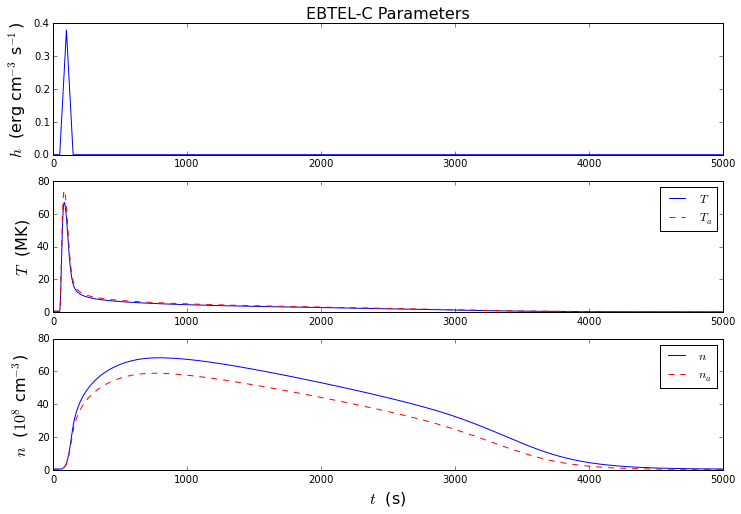

In [52]:
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

##Two-fluid EBTEL Run

Now we're going to run the two-fluid EBTEL code. Again, we'll print the configuration file and then run the code, save the data, and output the $T$ and $n$ profiles just to provide an extra check.

In [53]:
#print configuration file
config_dict['output_file'] = two_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [54]:
#run the simulation
runner = tfw.Runner(two_fluid_root+'bin/',two_fluid_root+'config/')
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)						
			   Two-fluid Model											
************************************************************************************

Original single-fluid code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 5000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Heating species: electron
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the

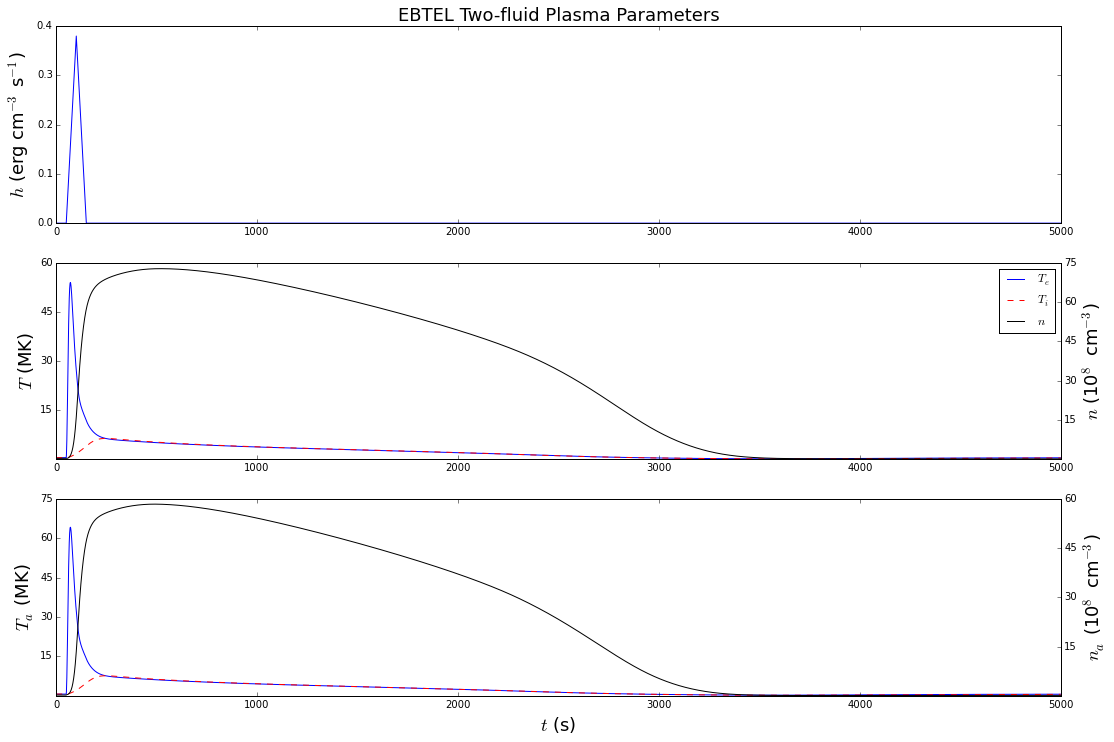

In [55]:
plotter=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter.plot_params()

Now, let's run the two-fluid code again, this time switching to ion heating so we can compare electron heating versus ion heating versus a single-fluid treatment. 

In [56]:
#print configuration file
config_dict['heat_species'] = 'ion'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [57]:
#run the simulation
runner = tfw.Runner(two_fluid_root+'bin/',two_fluid_root+'config/')
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)						
			   Two-fluid Model											
************************************************************************************

Original single-fluid code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 5000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Heating species: ion
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat

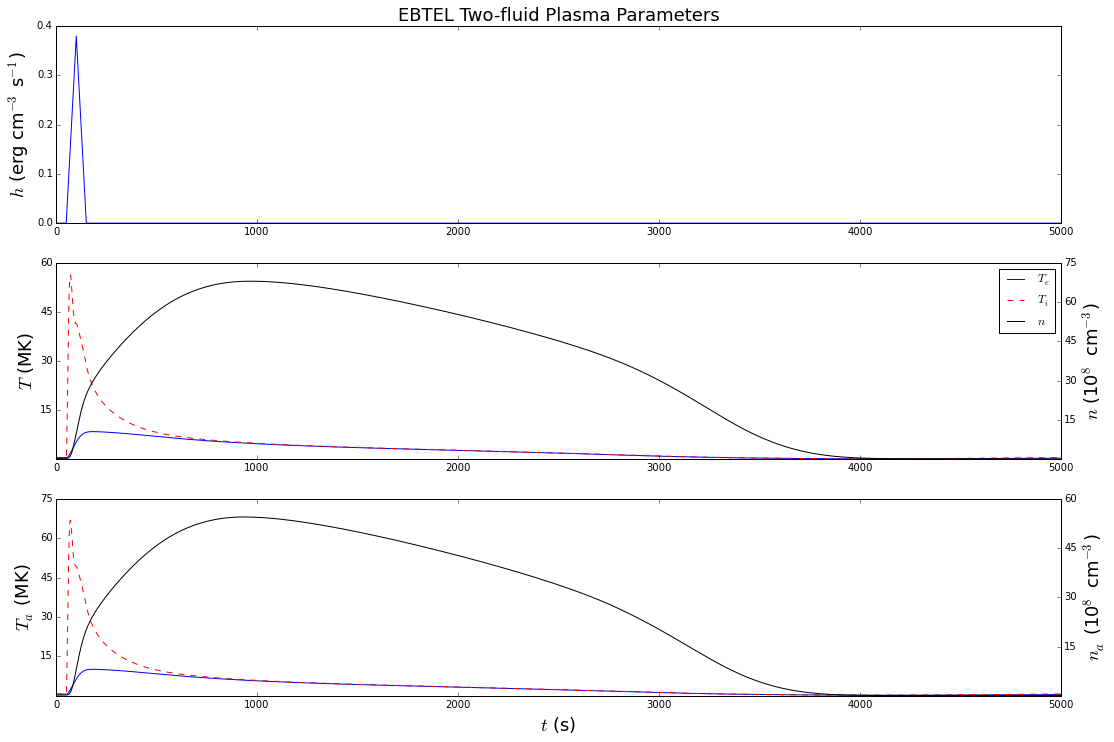

In [58]:
plotter_ion=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter_ion.plot_params()

##Emission Measure Comparison

Now, let's plot these two curves on top of each other and see how they match up.

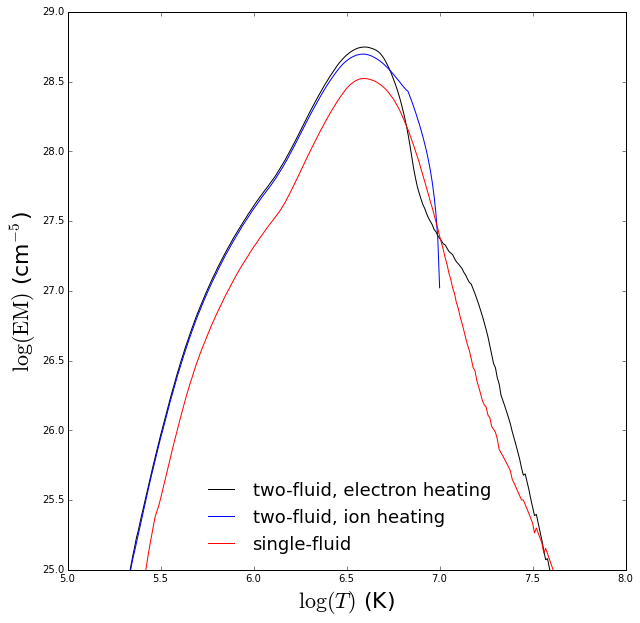

In [59]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid, electron heating')
ax.plot(plotter_ion.temp_dem,plotter_ion.em_cor,'b',label=r'two-fluid, ion heating')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid')
ax.set_xlim([5.0,8.0])
ax.set_ylim([25,29])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

##Comparison to Original EBTEL Model

The original EBTEL code (available <a href="https://github.com/rice-solar-physics/EBTEL">here</a>) was run in IDL outside of this notebook using the same parameters as above. Below, we will plot the typical plasma parameters and then load the EM curve and plot it on top of the above curves.

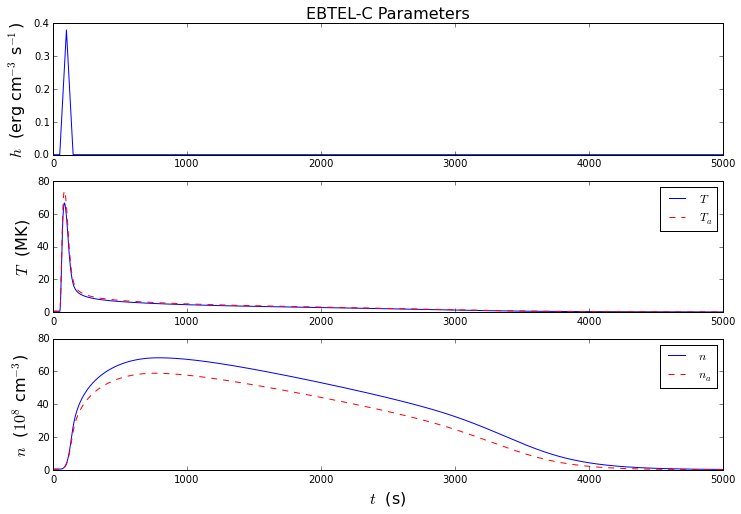

In [60]:
sfw.plot_ebtel('ebtel_data/','em_testing.txt')

Now, let's plot all of our EM curves on top of each other to see how our single- and two-fluid simulations compare. 

In [61]:
temp = np.loadtxt('ebtel_data/em_testing_dem.txt')
sf_old_tdem = temp[:,0]
sf_old_em = np.log10(temp[:,3])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


Peak EM temperature for two-fluid EBTEL code: 6.600
Peak EM temperature for single-fluid EBTEL C code: 6.590
Peak EM temperature for single-fluid EBTEL code: 6.590


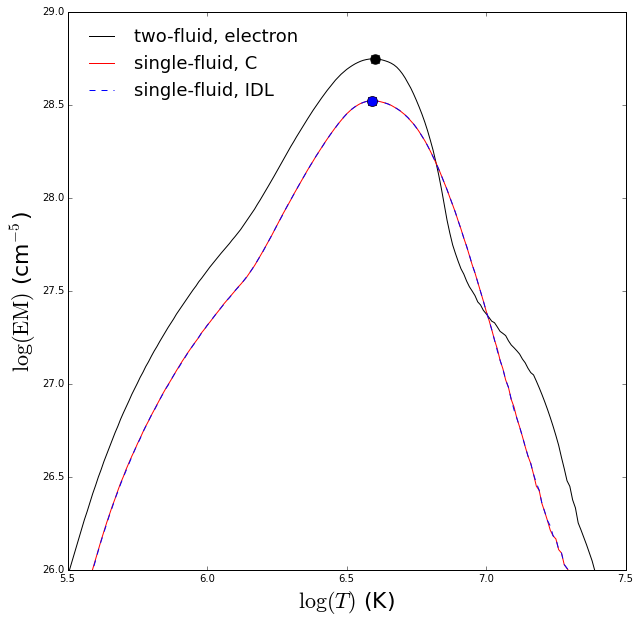

In [62]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
#plot em curves
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid, electron')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid, C')
ax.plot(sf_old_tdem,sf_old_em,'--b',label=r'single-fluid, IDL')
#plot max temperatures
ax.plot(plotter.temp_dem[np.argmax(plotter.em_cor)],np.max(plotter.em_cor),'ok',markersize=10)
ax.plot(sf_tdem[np.argmax(sf_em)],np.max(sf_em),'or',markersize=10)
ax.plot(sf_old_tdem[np.argmax(sf_old_em)],np.max(sf_old_em),'ob',markersize=10)
#print temperatures
print "Peak EM temperature for two-fluid EBTEL code: %.3f"%plotter.temp_dem[np.argmax(plotter.em_cor)]
print "Peak EM temperature for single-fluid EBTEL C code: %.3f"%sf_tdem[np.argmax(sf_em)]
print "Peak EM temperature for single-fluid EBTEL code: %.3f"%sf_old_tdem[np.argmax(sf_old_em)]
#set plot properties
ax.set_xlim([5.5,7.5])
ax.set_ylim([26,29])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()

##Density Evolution Comparison

It's obvious that the EM varies significantly between the single- and two-fluid cases in the temperature regime $5.5\lesssim \log{T}\lesssim7.0$. We would like to be able to explain this through the differences between our temperature and density evolutions. Since $\mathrm{EM}=n^2\mathrm{d}l$, the EM evolution is largely determined by the density evolution. Let's compare $n(t)$ for the single- and two-fluid cases.

In [18]:
#load single fluid ebtel-C T and n profiles
temp = np.loadtxt(single_fluid_root+'data/em_testing.txt')
sf_t = temp[:,0]
sf_T = temp[:,1]
sf_n = temp[:,2]
#load single fluid ebtel-IDL T and n profiles
temp = np.loadtxt('ebtel_data/em_testing.txt')
sf_idl_t = temp[:,0]
sf_idl_T = temp[:,1]
sf_idl_n = temp[:,2]

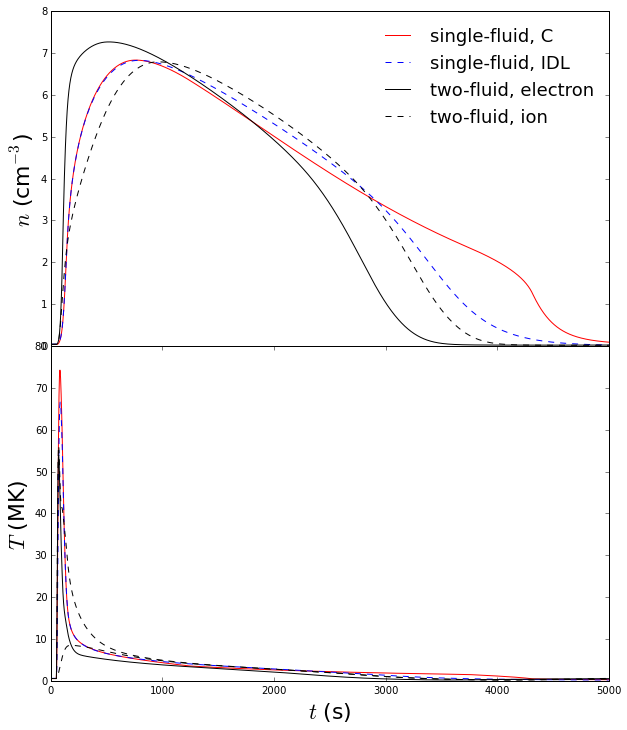

In [19]:
fig,ax = plt.subplots(2,1,figsize=(10,12))
plt.subplots_adjust(hspace=0)
ax[0].plot(sf_t,sf_n/10**9,'r',label=r'single-fluid, C')
ax[0].plot(sf_idl_t,sf_idl_n/10**9,'--b',label=r'single-fluid, IDL')
ax[0].plot(plotter.time,plotter.dens/10**9,'k',label=r'two-fluid, electron')
ax[0].plot(plotter_ion.time,plotter_ion.dens/10**9,'--k',label=r'two-fluid, ion')
ax[1].plot(sf_t,sf_T/10**6,'r')
ax[1].plot(sf_idl_t,sf_idl_T/10**6,'--b')
ax[1].plot(plotter.time,plotter.temp_e/10**6,'k')
ax[1].plot(plotter_ion.time,plotter_ion.temp_e/10**6,'--k')
ax[1].plot(plotter_ion.time,plotter_ion.temp_i/10**6,'--k')
ax[1].set_ylabel(r'$T$ (MK)',fontsize=22)
ax[1].set_xlabel(r'$t$ (s)',fontsize=22)
ax[0].set_ylabel(r'$n$ (cm$^{-3}$)',fontsize=22)
ax[0].set_xticks([])
#ax[0].set_xlim([0,1500])
#ax[1].set_xlim([0,1500])
lg = ax[0].legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()

Let' calculate where the two fluid density was greater than the single-fluid density. 

In [21]:
tf_gt_sf_dens = np.where(plotter.dens>sf_n)[0]

We'll mark these places on the above plot just to make sure we are evaluating the correct expression.

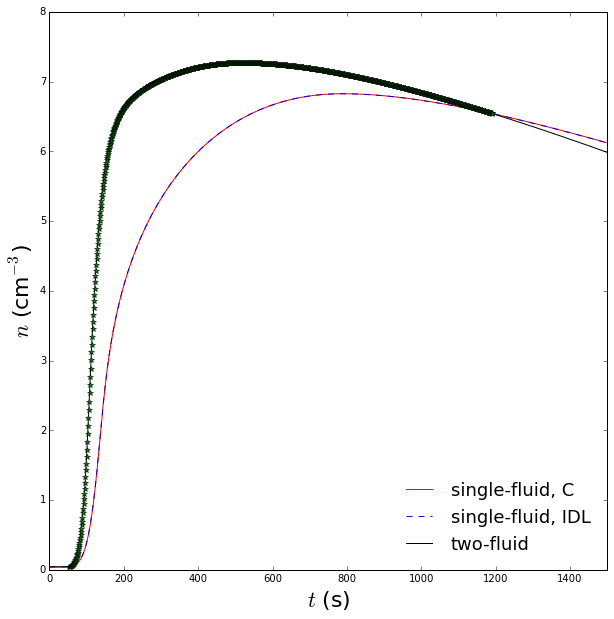

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(sf_t,sf_n/10**9,'r',label=r'single-fluid, C')
ax.plot(sf_idl_t,sf_idl_n/10**9,'--b',label=r'single-fluid, IDL')
ax.plot(plotter.time,plotter.dens/10**9,'k',label=r'two-fluid')
ax.plot(plotter.time[tf_gt_sf_dens],plotter.dens[tf_gt_sf_dens]/10**9,'*g')
ax.set_xlabel(r'$t$ (s)',fontsize=22)
ax.set_ylabel(r'$n$ (cm$^{-3}$)',fontsize=22)
ax.set_xlim([0,1500])
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()

Now, we can look at the range of temperatures over which $n_{2-fl}>n_{sf}$ and try to determine if this temperature range is consistent with the temperature range where $\mathrm{EM}_{2-fl}>\mathrm{EM}_{sf}$. Let's interpolate this range of ($\log_{10}$) temperatures over the $\mathrm{EM}$ range for the two-fluid case and then plot it on top of our  original $\mathrm{EM}$ comparison plot.

In [23]:
log_T_interp = np.log10(plotter.temp_e[tf_gt_sf_dens])
tdem_range = plotter.temp_dem[np.where(plotter.temp_dem>np.min(log_T_interp))[0][0]:np.where(plotter.temp_dem>np.max(log_T_interp))[0][-1]] 
em_range = plotter.em_cor[np.where(plotter.temp_dem>np.min(log_T_interp))[0][0]:np.where(plotter.temp_dem>np.max(log_T_interp))[0][-1]]

In [24]:
em_interp = np.interp(log_T_interp,tdem_range,em_range)

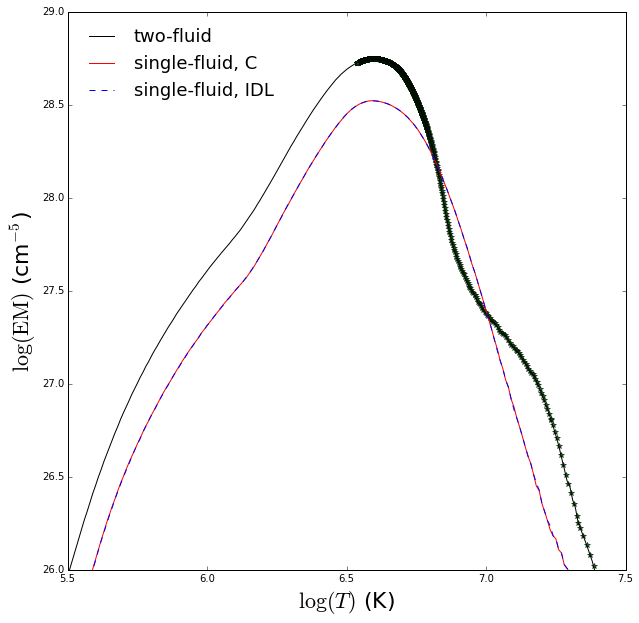

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
#plot em curves
ax.plot(log_T_interp,em_interp,'*g')
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid, C')
ax.plot(sf_old_tdem,sf_old_em,'--b',label=r'single-fluid, IDL')
#set plot properties
ax.set_xlim([5.5,7.5])
ax.set_ylim([26,29])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()

So, $n_{2-fl}>n_{sf}$ for only temperatures (mostly) hotward of the peak. Thus, the difference in density alone cannot account for the difference in the coolward emission measure curves. Because of the way we calculate the $\mathrm{EM}$, the time the plasma spends at a given temperature is also important. So let's find out how much time our single-fluid and two-fluid plasmas spend at $T<T^*$, where $T^*$ is the highest temperature where $n_{sf}>n_{2-fl}$.

In [26]:
T_star = 10**(log_T_interp[-1])
#two-fluid
t_Tcool_tf = plotter.time[np.where(plotter.temp_e<T_star)]
t_Tcool_tf = t_Tcool_tf[t_Tcool_tf>plotter.time[np.argmax(plotter.temp_e)]]
#single-fluid
t_Tcool_sf = sf_t[np.where(sf_T<T_star)]
t_Tcool_sf = t_Tcool_sf[t_Tcool_sf>sf_t[np.argmax(sf_T)]]

In [27]:
print "Amount of time spent below T* for t>t_max:"
print "Single-fluid: %f-%f=%f"%(t_Tcool_sf[-1],t_Tcool_sf[0],t_Tcool_sf[-1]-t_Tcool_sf[0])
print "Two-fluid: %f-%f=%f"%(t_Tcool_tf[-1],t_Tcool_tf[0],t_Tcool_tf[-1]-t_Tcool_tf[0])

Amount of time spent below T* for t>t_max:
Single-fluid: 4999.000000-1593.000000=3406.000000
Two-fluid: 4999.000000-1191.000000=3808.000000


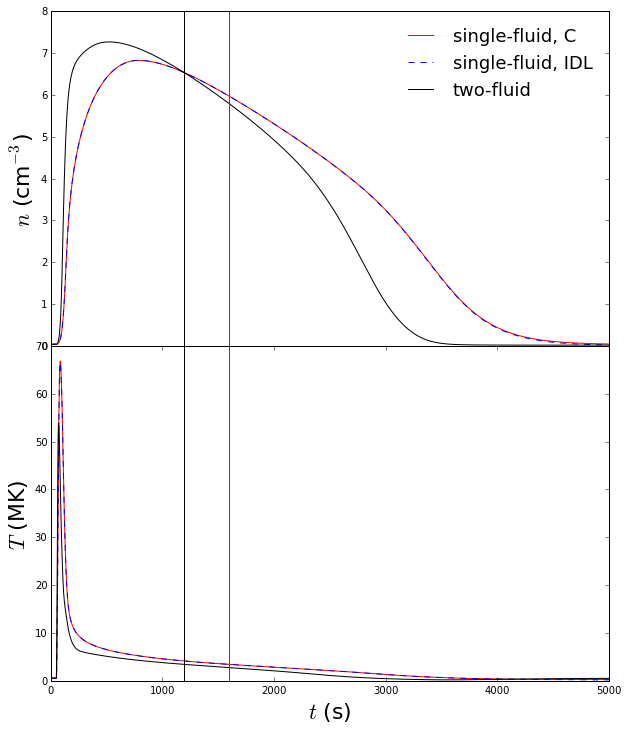

In [28]:
fig,ax = plt.subplots(2,1,figsize=(10,12))
plt.subplots_adjust(hspace=0)
#plot curves on different axes
ax[0].plot(sf_t,sf_n/10**9,'r',label=r'single-fluid, C')
ax[0].plot(sf_idl_t,sf_idl_n/10**9,'--b',label=r'single-fluid, IDL')
ax[0].plot(plotter.time,plotter.dens/10**9,'k',label=r'two-fluid')
ax[1].plot(sf_t,sf_T/10**6,'r')
ax[1].plot(sf_idl_t,sf_idl_T/10**6,'--b')
ax[1].plot(plotter.time,plotter.temp_e/10**6,'k')
ax[1].set_ylabel(r'$T$ (MK)',fontsize=22)
ax[1].set_xlabel(r'$t$ (s)',fontsize=22)
ax[0].set_ylabel(r'$n$ (cm$^{-3}$)',fontsize=22)
ax[0].set_xticks([])
#set some limits
ax[0].axvline(t_Tcool_sf[0],color='r')
ax[0].axvline(t_Tcool_sf[-1],color='r')
ax[0].axvline(t_Tcool_tf[0],color='k')
ax[0].axvline(t_Tcool_tf[-1],color='k')
ax[1].axvline(t_Tcool_sf[0],color='r')
ax[1].axvline(t_Tcool_sf[-1],color='r')
ax[1].axvline(t_Tcool_tf[0],color='k')
ax[1].axvline(t_Tcool_tf[-1],color='k')
lg = ax[0].legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()

##Multi-event Emission Measure Comparison

We've seen the resulting $\mathrm{EM}$ for a single event; what about for multiple heating events? We will test both a low-frequency case ($T_N=5000$ s) and a high-frequency case ($T_N=250$ s). We need to reconfigure our configuration files and reprint them. 

In [29]:
config_dict['t_start_switch'] = 'file'
config_dict['t_end_switch'] = 'file'
config_dict['total_time'] = 80000.0
config_dict['heat_species'] = 'electron'
Hn = 8.3e-3

In [30]:
def make_time_arrays(conf_dict,ti):
    conf_dict['num_events'] = int(np.ceil(conf_dict['total_time']/(2.0*conf_dict['t_pulse_half'] + ti)))
    conf_dict['start_time_array'],conf_dict['end_time_array'] = np.empty(conf_dict['num_events']),np.empty(conf_dict['num_events'])
    for i in range(conf_dict['num_events']):
        conf_dict['start_time_array'][i] = i*(2.0*conf_dict['t_pulse_half'] + ti)
        conf_dict['end_time_array'][i] = conf_dict['start_time_array'][i] + 2.0*conf_dict['t_pulse_half']
        
    return conf_dict

###High-frequency Heating, $T_n=250$ s

In [31]:
config_dict = make_time_arrays(config_dict,250)
config_dict['h_nano'] = 2.0*Hn*config_dict['total_time']/(config_dict['num_events']*2.0*config_dict['t_pulse_half'])

In [32]:
#print config file
#single-fluid
config_dict['output_file'] = single_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#two-fluid
config_dict['output_file'] = two_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [33]:
#run single-fluid case
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

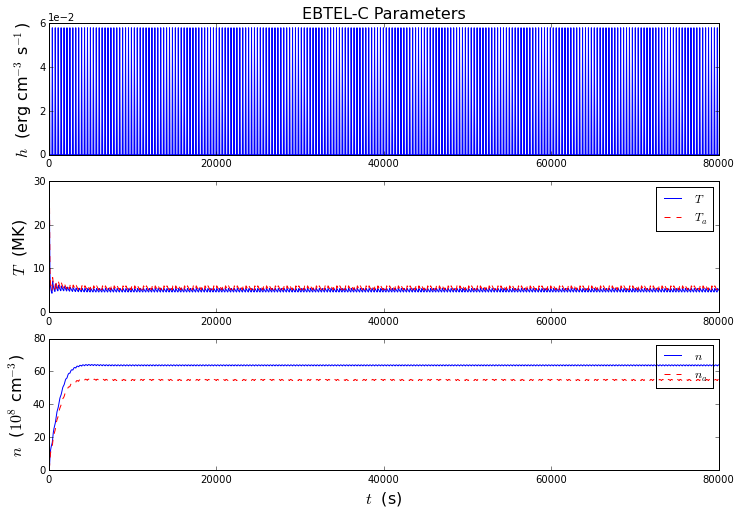

In [34]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [35]:
#run two-fluid case
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            		Initial Conditions		                       
************************************************************************************
Te(t = 0) = 546389.500337 K
Ti(t = 0) = 546389.500337 K
n(t = 0) = 40332246.245217 cm^-3
pe(t = 0) = 0.003041 dyne cm^-2
pi(t = 0) = 0.003041 dyne cm^-2
r3(t = 0) = 10.025657

The results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing.txt
The DEM results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_dem.txt
Number of simulated heating events: 229
The process took 24876.000000 milliseconds to run


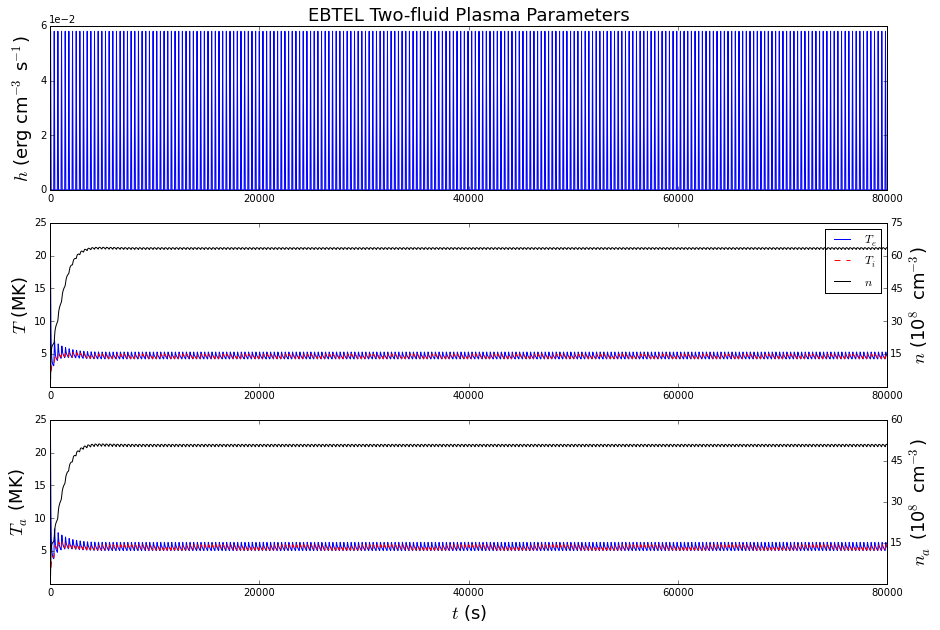

In [36]:
#check the output
plotter=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter.plot_params()

Now, let's compare the resulting emission measure for both the single- and two-fluid cases much in the same way that we've done previously.

In [37]:
#load single-fluid EM data
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_tdem = temp[:,0]
sf_em = temp[:,4]

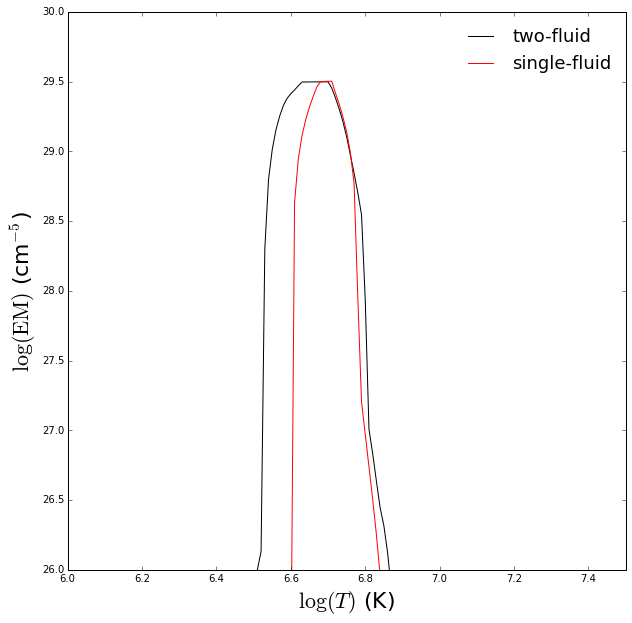

In [38]:
#build comparison figure
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid')
ax.set_xlim([6.0,7.5])
ax.set_ylim([26,30])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

###Low-frequency Heating, $T_n=5000$ s

In [39]:
config_dict = make_time_arrays(config_dict,5000)
config_dict['h_nano'] = 2.0*Hn*config_dict['total_time']/(config_dict['num_events']*2.0*config_dict['t_pulse_half'])

In [40]:
#print config file
#single-fluid
config_dict['output_file'] = single_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#two-fluid
config_dict['output_file'] = two_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [41]:
#run single-fluid case
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

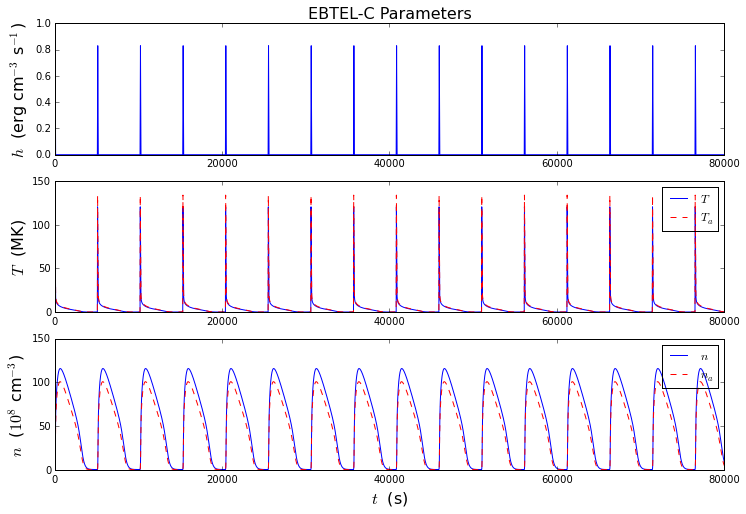

In [42]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [43]:
#run two-fluid case
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            		Initial Conditions		                       
************************************************************************************
Te(t = 0) = 546389.500337 K
Ti(t = 0) = 546389.500337 K
n(t = 0) = 40332246.245217 cm^-3
pe(t = 0) = 0.003041 dyne cm^-2
pi(t = 0) = 0.003041 dyne cm^-2
r3(t = 0) = 10.025657

The results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing.txt
The DEM results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_dem.txt
Number of simulated heating events: 16
The process took 22075.000000 milliseconds to run


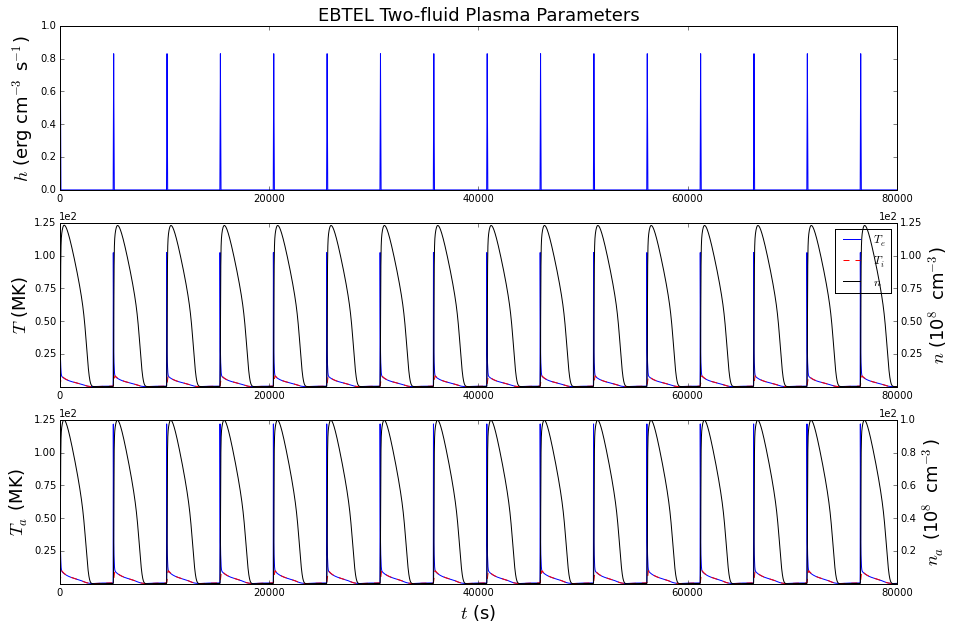

In [44]:
#check the output
plotter=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter.plot_params()

In [45]:
#load single-fluid EM data
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_tdem = temp[:,0]
sf_em = temp[:,4]

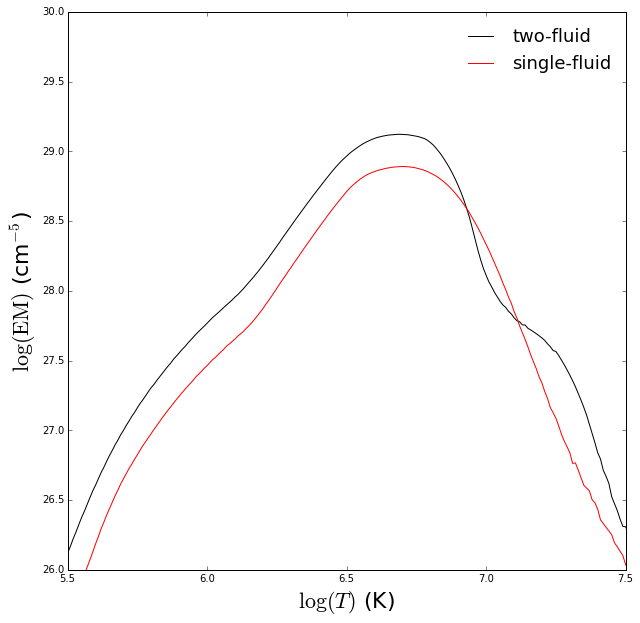

In [46]:
#build comparison figure
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid')
ax.set_xlim([5.5,7.5])
ax.set_ylim([26,30])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

Unsurprisingly, the $\mathrm{EM}$ comparison for $T_n=5000$ s looks nearly identical to our single-pulse emission measure comparision. This is because the pulses are spaced such that the plasma is allowed to cool/drain back to its equilibrium temperature/density before the next heating pulse. Thus, in calculating the $\mathrm{EM}$, we are just averaging $\approx15$ of these curves and then taking their average. Since they are all nearly equivalent, we get exactly what we would have gotten if we had just compared the result of a single heating pulse.

###Power-law heating

In our two-fluid runs, we've thus far assumed that the heating amplitudes are uniform, but what if instead we chose them from a power-law distribution? Let's use $\alpha=-2.5$ as our index. We need only change a few options in our configuration file. Then, we can again run the low-frequency and high-frequency heating cases for both the single- and two-fluid models and see how our emission measure compares.

In [47]:
config_dict['amp_switch'] = 'power_law'
config_dict['alpha'] = -2.5
Q0 = 1e+23 #lower bound on nanoflare energy
Q1 = 1e+25 #upper bound on nanoflare energy
Ah = 1e+14 #loop cross sectional area
Hn = 8.3e-3 #Average nanoflare energy distributed over the total time
config_dict['amp0'] = Q0/(config_dict['loop_length']*1.0e+8*Ah*2.0*config_dict['t_pulse_half']) #lower bound on nanoflare volumetric heating rate
config_dict['amp1'] = Q1/(config_dict['loop_length']*1.0e+8*Ah*2.0*config_dict['t_pulse_half']) #upper bound on nanoflare volumetric heating rate

####High-frequency heating, power-law distribution ($\alpha=-2.5$)

In [48]:
config_dict = make_time_arrays(config_dict,250)

In [49]:
#print config file
#single-fluid
config_dict['output_file'] = single_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#two-fluid
config_dict['output_file'] = two_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [50]:
#run single-fluid case
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

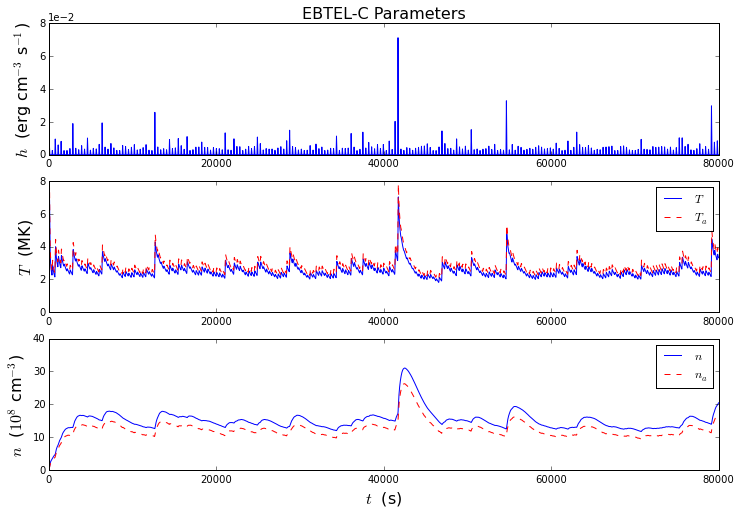

In [51]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [52]:
#run two-fluid case
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            		Initial Conditions		                       
************************************************************************************
Te(t = 0) = 546389.500337 K
Ti(t = 0) = 546389.500337 K
n(t = 0) = 40332246.245217 cm^-3
pe(t = 0) = 0.003041 dyne cm^-2
pi(t = 0) = 0.003041 dyne cm^-2
r3(t = 0) = 10.025657

The results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing.txt
The heating amplitude results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_heat_amp.txt
The DEM results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_dem.txt
Number of simulated heating events: 229
The process took 23085.000000 milliseconds to run


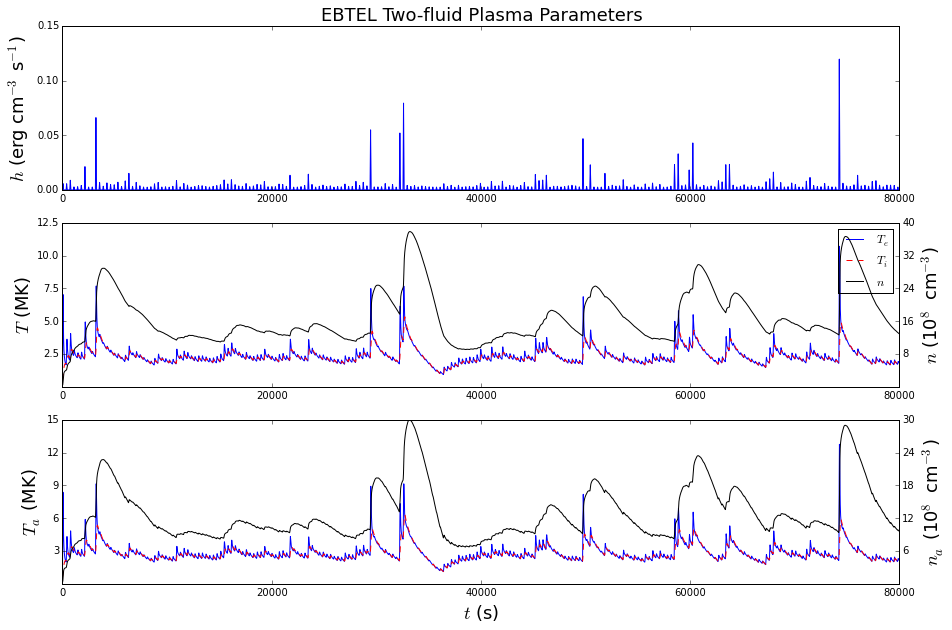

In [53]:
#check the output
plotter=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter.plot_params()

In [54]:
#load single-fluid EM data
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_tdem = temp[:,0]
sf_em = temp[:,4]

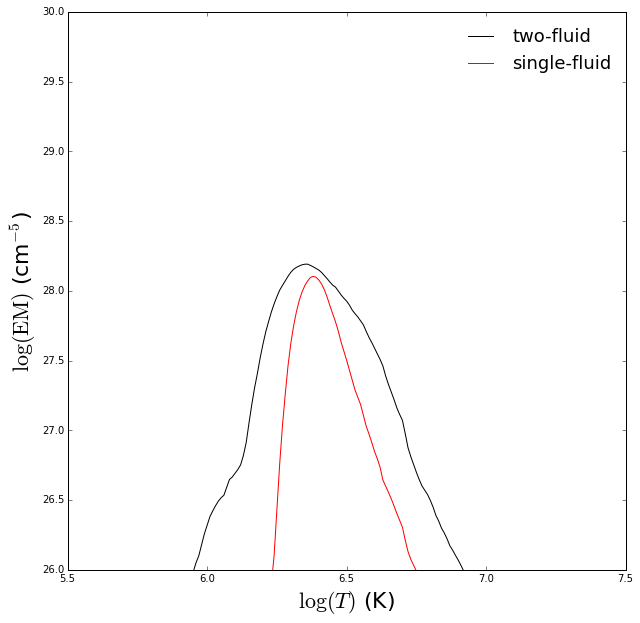

In [55]:
#build comparison figure
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid')
ax.set_xlim([5.5,7.5])
ax.set_ylim([26,30])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

####Low-frequency heating, power-law distribution ($\alpha=-2.5$) 

In [56]:
#add waiting time arrays to configuration dictionary
config_dict = make_time_arrays(config_dict,5000)

In [57]:
#print config file
#single-fluid
config_dict['output_file'] = single_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#two-fluid
config_dict['output_file'] = two_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [58]:
#run single-fluid case
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

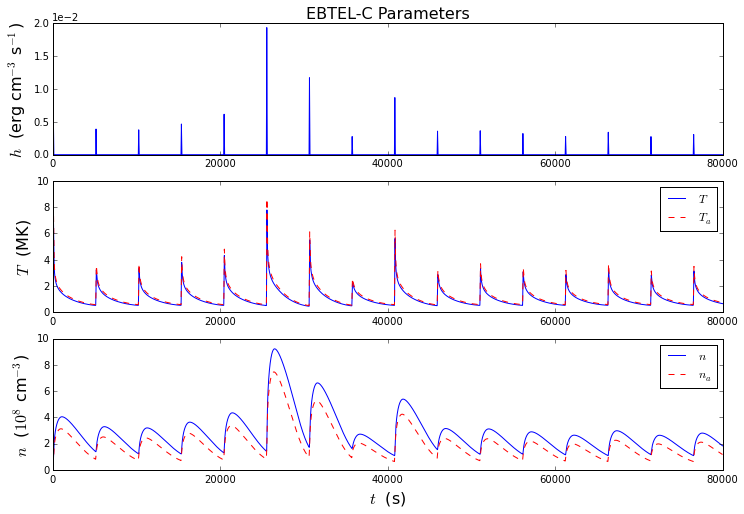

In [59]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [60]:
#run two-fluid case
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            		Initial Conditions		                       
************************************************************************************
Te(t = 0) = 546389.500337 K
Ti(t = 0) = 546389.500337 K
n(t = 0) = 40332246.245217 cm^-3
pe(t = 0) = 0.003041 dyne cm^-2
pi(t = 0) = 0.003041 dyne cm^-2
r3(t = 0) = 10.025657

The results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing.txt
The heating amplitude results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_heat_amp.txt
The DEM results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_dem.txt
Number of simulated heating events: 16
The process took 21594.000000 milliseconds to run


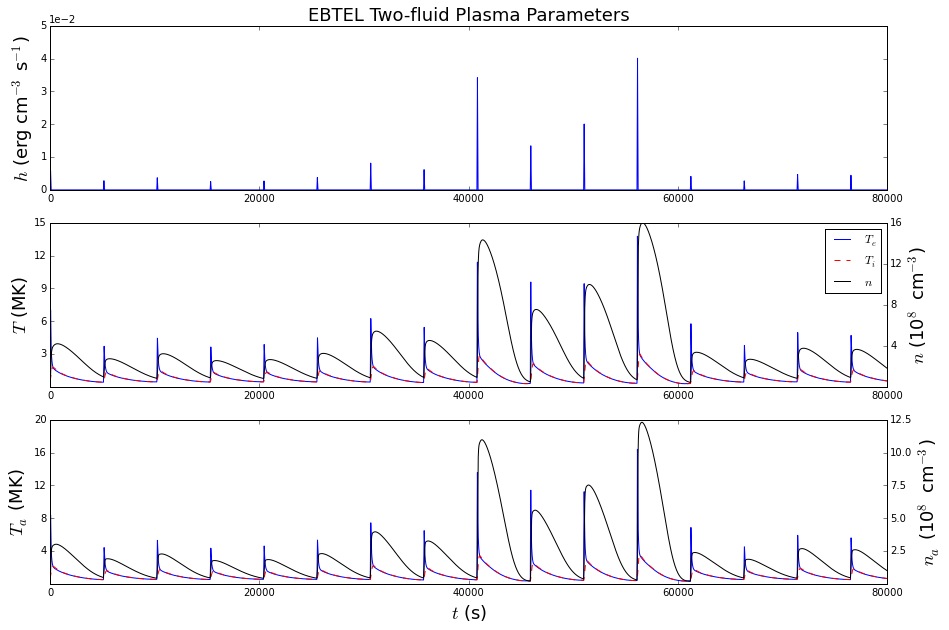

In [61]:
#check the output
plotter=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter.plot_params()

In [62]:
#load single-fluid EM data
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_tdem = temp[:,0]
sf_em = temp[:,4]

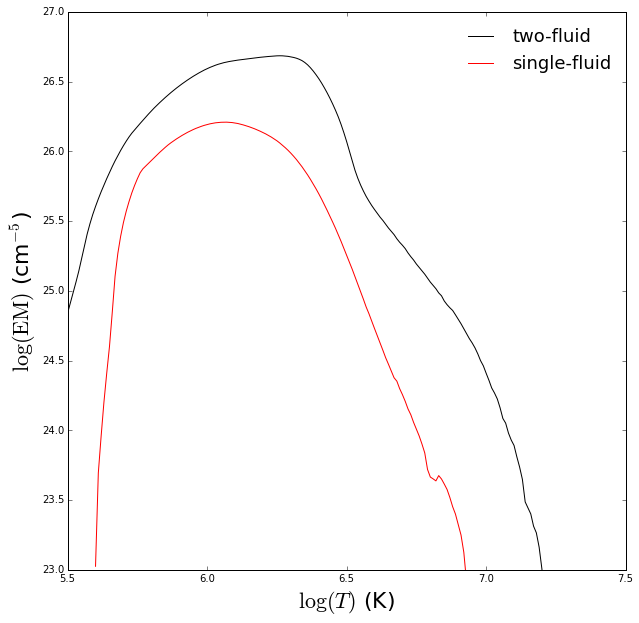

In [63]:
#build comparison figure
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(plotter.temp_dem,plotter.em_cor,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid')
ax.set_xlim([5.5,7.5])
ax.set_ylim([23,27])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)